## Wavelet Practice: Spy Sounds

A door is encoded with a number pad (0-9). We can't see the door, but through nefariouis means we have a recording of someone opening it. Quick, we need to decode this [mystery signal](data/mystery_signal.wav)! The door code is encoded in this mystery_signal.wav file but we need to know what music notes and their order to open it

We know that the door code is set up as:
- A note: 0
- B note: 1
- C note: 2
- D note: 3
- E note: 4
- F note: 5

In [1]:
import IPython
print("Give it a listen!")
IPython.display.Audio("data/mystery_signal.wav")

Give it a listen!


In [2]:
# note frequency in hz
a_freq = 440
print(f"A note {a_freq} hz")
b_freq = 494
print(f"B note {b_freq} hz")
c_freq = 261
print(f"C note {c_freq} hz")
d_freq = 293
print(f"D note {d_freq} hz")
e_freq = 330
print(f"E note {e_freq} hz")
f_freq = 350
print(f"F note {f_freq} hz")

A note 440 hz
B note 494 hz
C note 261 hz
D note 293 hz
E note 330 hz
F note 350 hz


First, let's us extract and review the raw audio .wav file

In [11]:
import ipywidgets
import pandas as pd
import numpy as np
import scipy.io.wavfile
import math
import matplotlib.pyplot as plt

import pywt

In [12]:
# Extract audio .wav file
import scipy.io.wavfile
sampleRate, signalData = scipy.io.wavfile.read("data/mystery_signal.wav")

# Amplitude determines the volume of thes ound
# Frequency determines the chord

duration = len(signalData) / sampleRate
time = np.arange(0, duration, 1/sampleRate) 

print(f"Sample Rate: {sampleRate}")
print(f"duration = {duration} seconds (sample rate and audioBuffer = {len(signalData)} / {sampleRate}")
print(f"len of audio file = {len(signalData)}")
print(f"Total Length in time = {len(time)}")

Sample Rate: 10000
duration = 6.0 seconds (sample rate and audioBuffer = 60000 / 10000
len of audio file = 60000
Total Length in time = 60000


In [13]:
signal_df = pd.DataFrame({'time (seconds)': time, 'amplitude': signalData})
signal_df.head()

,time (seconds),amplitude
0,0.0000,11182
1,0.0001,29148
2,0.0002,2847
3,0.0003,14564
4,0.0004,21618


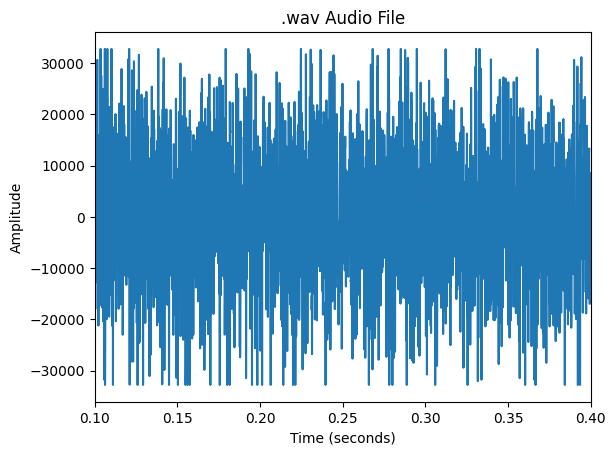

In [18]:
# Plot .wav file
fig, ax = plt.subplots()
fig = plt.plot(signal_df["time (seconds)"], signal_df["amplitude"])
plt.title(".wav Audio File")
ax.set_xlim(signal_df["time (seconds)"][1000], signal_df["time (seconds)"][4000])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

size (39, 60000) with 39 scales and 60000 time steps
x-axis be default is: 60000
y-axis be default is: 39


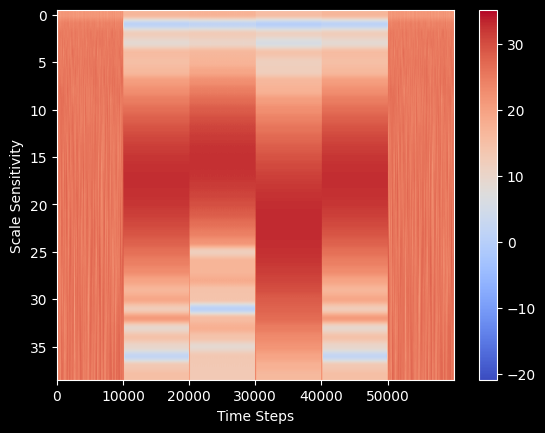

In [45]:
# Amplitude determines the volume of thes ound
# Frequency determines the chord

wavelet_mother = "morl" # morlet

# scale determinse how squished or stretched a wavelet is
scales = np.arange(1, 40)
wavelet_coeffs, freqs = pywt.cwt(signalData, scales, wavelet = wavelet_mother)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")


# Plot scalogram
plt.style.use('dark_background')
data = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.show()

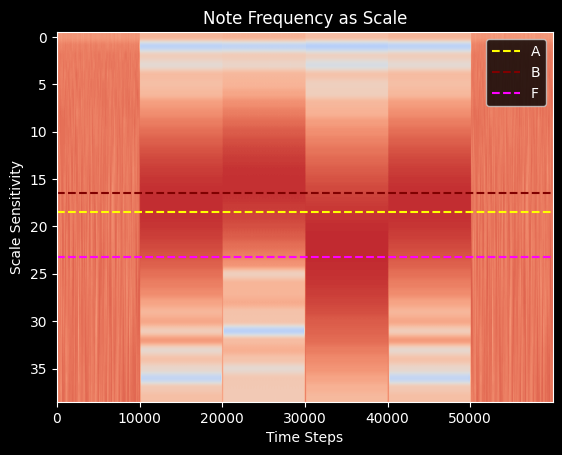

In [52]:
# to convert HZ frequency to a scale = hz *.0001 (where 0.01  # 100 Hz sampling) then frequency2scale
# note frequency in hz
sample_rate = 1/sampleRate
a_freq = pywt.frequency2scale(wavelet_mother, 440*sample_rate)
plt.axhline(y=a_freq, color='yellow', linestyle='--', label='A')
b_freq = pywt.frequency2scale(wavelet_mother, 494*sample_rate)
plt.axhline(y=b_freq, color="maroon", linestyle='--', label='B')
c_freq = pywt.frequency2scale(wavelet_mother, 261*sample_rate)
#plt.axhline(y=c_freq, color='green', linestyle='--', label='C')
d_freq = pywt.frequency2scale(wavelet_mother, 293*sample_rate)
#plt.axhline(y=d_freq, color='blue', linestyle='--', label='D')
e_freq = pywt.frequency2scale(wavelet_mother, 330*sample_rate)
#plt.axhline(y=e_freq, color='cyan', linestyle='--', label='E')
f_freq = pywt.frequency2scale(wavelet_mother, 350*sample_rate)
plt.axhline(y=f_freq, color='fuchsia', linestyle='--', label='F')

plt.style.use('dark_background')
data = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.title("Note Frequency as Scale")
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.legend()
plt.savefig("expected.png")
plt.show()

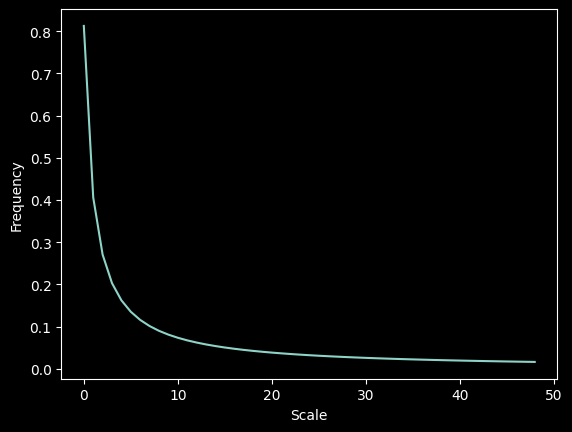

In [13]:
# Useful to determine the right range of scales
plt.style.use('dark_background')
plt.xlabel("Scale")
plt.ylabel("Frequency")
plt.plot(freqs)

49
(49, 60000)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[8125.         4062.5        2708.33333333 2031.25       1625.
 1354.16666667 1160.71428571 1015.625       902.77777778  812.5
  738.63636364  677.08333333  625.          580.35714286  541.66666667
  507.8125      477.94117647  451.38888889  427.63157895  406.25
  386.9047619   369.31818182  353.26086957  338.54166667  325.
  312.5         300.92592593  290.17857143  280.17241379  270.83333333
  262.09677419  253.90625     246.21212121  238.97058824  232.14285714
  225.69444444  219.59459459  213.81578947  208.33333333  203.125
  198.17073171  193.45238095  188.95348837  184.65909091  180.55555556
  176.63043478  172.87234043  169.27083333  165.81632653]


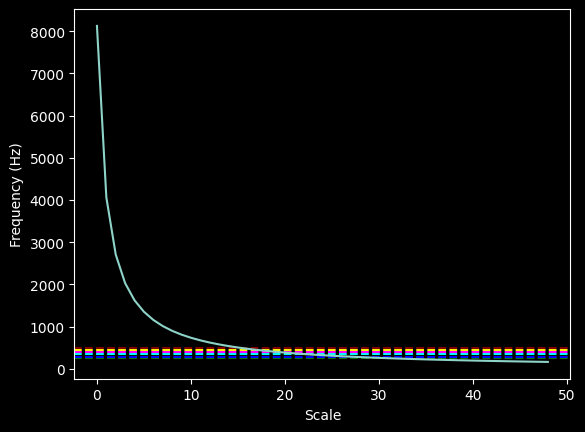

In [14]:
wavelet_mother = "morl" # morlet

# scale determinse how squished or stretched a wavelet is
scales = np.arange(1, 50)
wavelet_coeffs, freqs = pywt.cwt(signalData, scales, wavelet = wavelet_mother)

print(len(wavelet_coeffs))
print(wavelet_coeffs.shape)

# freq is the same as scale2freq of the wavlet scales
print(pywt.scale2frequency('morl', scales) == freqs)

# freqs is normalized frequencies, so needs to be multiplied by thes sampling frequency to turn back into frequencies
#which means that you need to multiply them by your sampling frequency (500Hz) to turn them into actual frequencies.
plt.axhline(y=440, color='yellow', linestyle='--', label='A')
plt.axhline(y=494, color="maroon", linestyle='--', label='B')
plt.axhline(y=261, color='green', linestyle='--', label='C')
plt.axhline(y=293, color='blue', linestyle='--', label='D')
plt.axhline(y=350, color='cyan', linestyle='--', label='E')
plt.axhline(y=391, color='fuchsia', linestyle='--', label='F')
plt.style.use('dark_background')
plt.xlabel("Scale")
plt.ylabel("Frequency (Hz)")
print(freqs*sampleRate)
plt.plot(freqs*sampleRate)
#plt.plot(freqs*1/sampleRate)
# Usefulful to determine the right range of scales

size (30, 60000) with 30 scales and 60000 time steps
x-axis be default is: 60000
y-axis be default is: 30


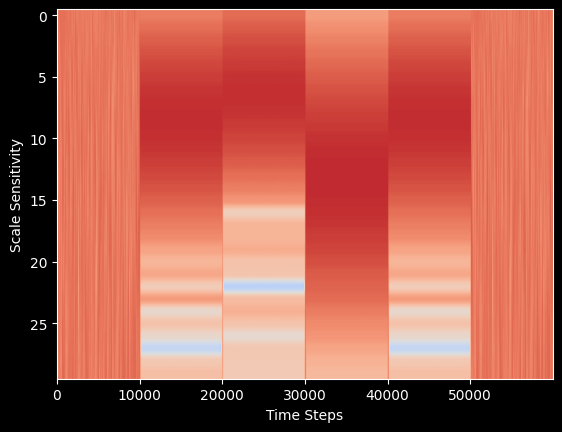

In [15]:
wavelet_mother = "morl" # morlet

# scale determinse how squished or stretched a wavelet is
scales = np.arange(10, 40)
wavelet_coeffs, freqs = pywt.cwt(signalData, scales, wavelet = wavelet_mother)

# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis be default is: {wavelet_coeffs.shape[0]}")

import matplotlib.pyplot as plt

# Plot scalogram
plt.style.use('dark_background')
data = np.log2(np.square(abs(wavelet_coeffs))) # compare the magntiude
plt.xlabel("Time Steps")
plt.ylabel("Scale Sensitivity")
plt.imshow(data, 
           vmax=(data).max(), vmin=(data).min(),
           cmap="coolwarm", aspect="auto")
plt.show()

In [28]:
# Determine Frequencies associated wtih each scale for each time distruptive step
# Automate report which note is most associated with each range of time steps (most significant range)

In [29]:
# Cone of Influence: COI
# Shows regions of scalogram that are potentionally being impacted by the edge-effect where streched wavelets extend beyond the edge of an interval
# matlab breakdown: https://www.mathworks.com/help/wavelet/ug/boundary-effects-and-the-cone-of-influence.html
